## Algorithm

Signle-linkage algorithm works as follows:
<ol>
    <li>Treat every point as a cluster</li>
    <li>Build pairwise distance matrix between points (Any meaningfull metric can be choosen)</li>
    <li>Select two points with minimum distance</li>
    <li>Merge clusters that points belong to</li>
    <li>Repeat step 3 untill desired amount of clusters achieved</li>
</ol>

To improve this algorithm, instead of distance matrix, I build sorted list of distances, so it isn't needed to find minimum distance each time.

## Source Code

Importing libraries

In [0]:
from matplotlib import pyplot as plt
from itertools import product
import numpy as np
import time

Setting amount of points, number of clusters and maximum value for a point

In [0]:
n_points = 100
n_clusters = 3
max_range = 10000

Generating points on a line and plotting

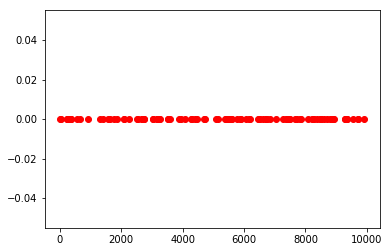

In [0]:
points = np.random.randint(0, max_range, (n_points,))
plt.plot(points, np.zeros((n_points,)), 'ro')
plt.show()

Implementation of single-linkage hierarchical clustering

In [0]:
def hierarchical_clustering(n_clusters, points):
    cluster_labels = np.arange(points.shape[0])
    distances = []
    for i in range(points.shape[0]):
        for j in range(i+1, points.shape[0]):
            distances.append((i, j, np.abs(points[i] - points[j])))
    distances.sort(key=lambda x: x[2])
    num_clusters = len(cluster_labels)
    for distance in distances:
        to_merge = (distance[0], distance[1])
        if cluster_labels[to_merge[0]] == cluster_labels[to_merge[1]]:
            continue
        if num_clusters <= n_clusters:
            break
        new_cluster = cluster_labels[to_merge[0]]
        old_cluster = cluster_labels[to_merge[1]]
        cluster_labels[cluster_labels == old_cluster] = new_cluster
        num_clusters -= 1
    return cluster_labels

Executing clustering on generated points

In [0]:
start = time.time()
cluster_labels = hierarchical_clustering(n_clusters, points)
end = time.time()

Time to execute algorithm (seconds)

In [0]:
end - start

0.007000923156738281

Plotting results

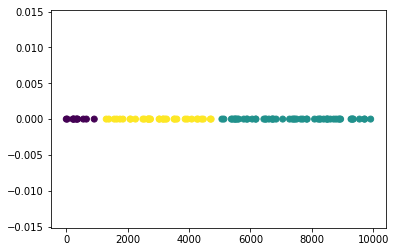

In [0]:
labels = np.unique(cluster_labels)
label_map = {}
for i in range(len(labels)):
    label_map[labels[i]] = i
new_cluster_labels = []
for i in range(len(cluster_labels)):
    new_cluster_labels.append(label_map[cluster_labels[i]])
plt.scatter(points, np.zeros((n_points,)), c=new_cluster_labels)
plt.show()

## Bad Result

In general, disadvantage of single-linkage clustering is that it doesn't take into account all points in the cluster, this might lead to incorrect clustering. And following examples demonstrate that

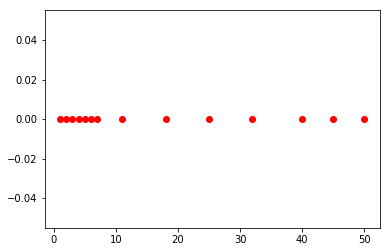

In [0]:
points = np.array([1, 2, 3, 4, 5, 6, 7, 11, 18, 25, 32, 40, 45, 50])
plt.plot(points, np.zeros((points.shape[0],)), 'ro')
plt.show()

In [0]:
cluster_labels = hierarchical_clustering(2, points)

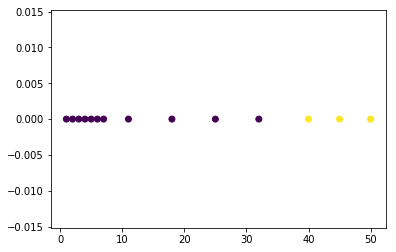

In [0]:
labels = np.unique(cluster_labels)
label_map = {}
for i in range(len(labels)):
    label_map[labels[i]] = i
new_cluster_labels = []
for i in range(len(cluster_labels)):
    new_cluster_labels.append(label_map[cluster_labels[i]])
plt.scatter(points, np.zeros((points.shape[0],)), c=new_cluster_labels)
plt.show()

As we can see, single-linkage cluster assigned point between 30 and 40 to purple cluster, but this point is quite far from most points of the purple cluster. It seems reasonable to assign this point to yellow cluster. Such problem called chaining phenomenon